In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_final=pd.read_csv(r'C:\Users\Ramakrushna das\final_dataset_flighttttt_2.csv')
df_final.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,22,20,1,10,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,5,50,13,15,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,9,25,4,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,18,5,23,30,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,16,50,21,35,4,45


In [3]:
X = df_final.drop(['Price'], axis=1)
y = df_final['Price']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
##converting dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [4]:
X_test_pca

array([[ 0.76570598,  0.80727541],
       [-1.93960901, -2.6727294 ],
       [ 2.32539425, -0.33925455],
       ...,
       [ 0.88096007,  0.44605827],
       [-0.22186865,  1.22204008],
       [ 1.254701  , -0.06973402]])

In [5]:
X_train_pca

array([[-2.25908955,  1.31158755],
       [-0.85337702,  1.23101583],
       [-2.25777473,  0.48315808],
       ...,
       [ 1.76421944, -0.03035166],
       [-3.72994098, -1.92231723],
       [-0.15531572, -1.38663372]])

In [6]:
X_train_pca.shape

(7155, 2)

In [7]:
X_test_pca.shape

(3525, 2)

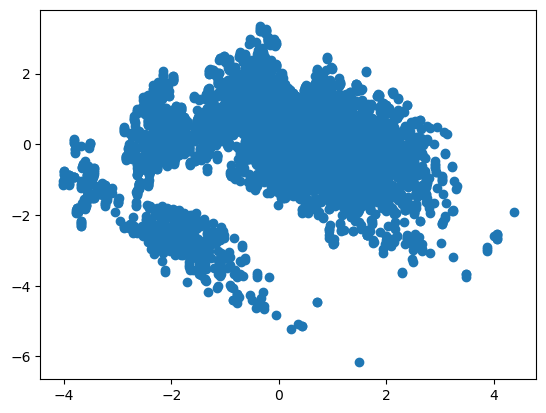

In [8]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])

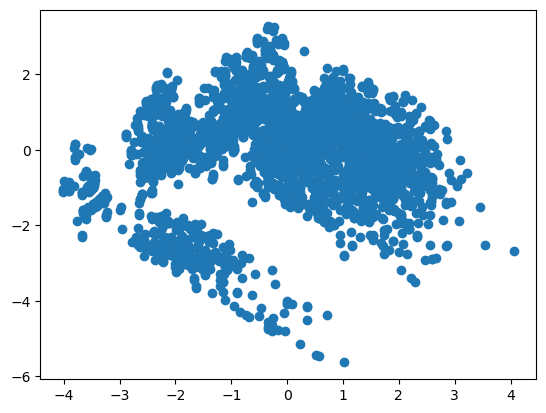

In [9]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1])

In [10]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[27125.634669093713,
 15305.123482587418,
 10132.381960477913,
 7594.655641717028,
 5768.769863277295,
 4690.583503550902,
 4315.536254766521,
 3403.4934476471253,
 3086.1739495175575,
 2894.781793567525,
 2609.323612933822,
 2420.197008803895,
 2221.493561074164,
 2102.8262662231946,
 1908.9064921037025,
 1843.5615165601157,
 1731.842661565459,
 1603.5657939749199,
 1524.1573351579323]

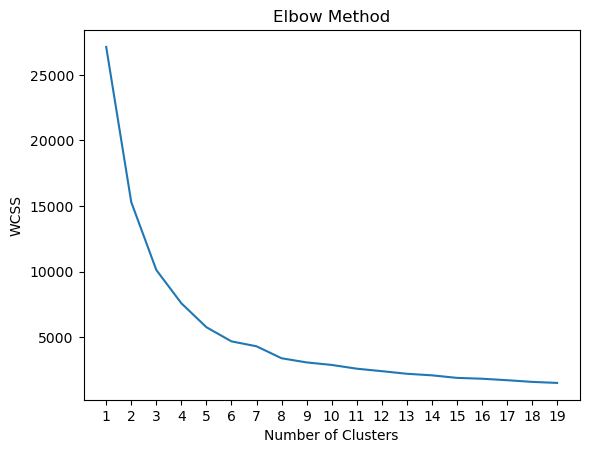

In [12]:

plt.plot(range(1,20), wcss)
plt.xticks(range(1,20))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeanss=KMeans(n_clusters=8,init='k-means++')
y_train_labels=kmeanss.fit_predict(X_train_pca)
y_test_labels=kmeanss.predict(X_test_pca)

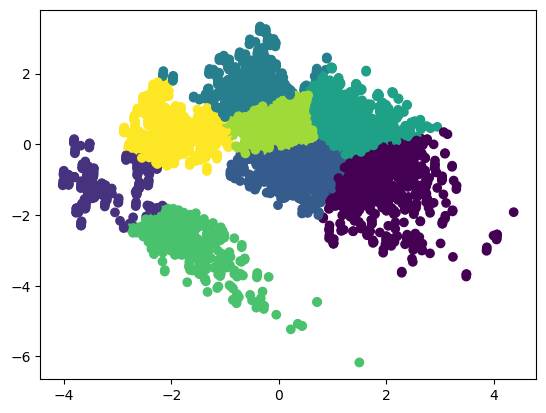

In [14]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train_labels)

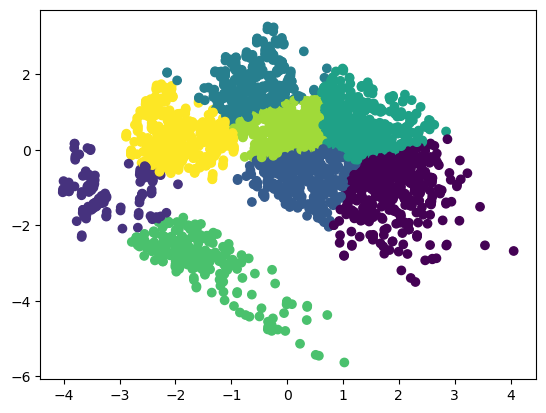

In [15]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test_labels)

In [16]:
##silhoute score for train data 

from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
kmm=KMeans()
for i in range(2,20):
    kmm= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmm.fit(X_train_pca)
    score=silhouette_score(X_train_pca,kmm.labels_)
    silhouette_coefficients.append(score)

In [17]:
silhouette_coefficients

[0.4211656882849341,
 0.37654418339999185,
 0.37738125440376746,
 0.3869991248284326,
 0.4000918560502529,
 0.3657957251208249,
 0.39434858629301656,
 0.37402273276901227,
 0.3621418378513084,
 0.35431425880846945,
 0.36094588958515156,
 0.3587390934326733,
 0.3480919167260154,
 0.35270875872749985,
 0.34419431963200764,
 0.34153434196252547,
 0.3455030542238464,
 0.34442617124250563]

In [18]:
score

0.34442617124250563

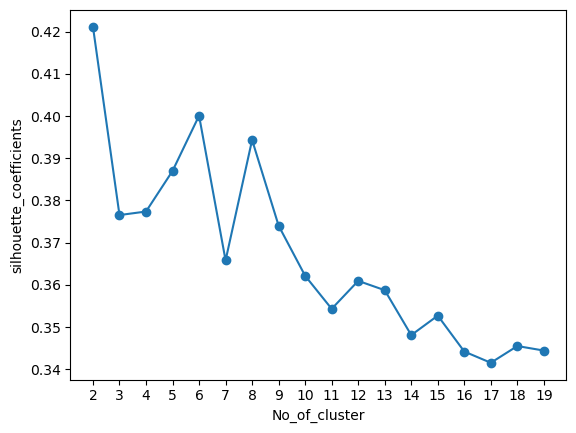

In [19]:
plt.plot(range(2,20),silhouette_coefficients,marker='o')
plt.xticks(range(2,20))
plt.xlabel('No_of_cluster')
plt.ylabel('silhouette_coefficients')
plt.show()

In [20]:
##silhotte for test data
silhouette_coefficientss=[]
k_means=KMeans()
for i in range(2,20):
    k_means= KMeans(n_clusters=i,init='k-means++',random_state=42)
    k_means.fit(X_test_pca)
    scoree=silhouette_score(X_test_pca,k_means.labels_)
    silhouette_coefficientss.append(scoree)

In [21]:
scoree

0.371035083682371

In [22]:
silhouette_coefficientss

[0.4504728319993325,
 0.36718574056201464,
 0.38994945056768526,
 0.3942034432086765,
 0.4092202791530624,
 0.4075474704960171,
 0.3843252152212105,
 0.3695646242500049,
 0.37287207989596155,
 0.3784162419867626,
 0.3646627740784091,
 0.36247659421546896,
 0.3738505504401351,
 0.36727823108960683,
 0.36174151591667975,
 0.36728861500071364,
 0.3699721407143262,
 0.371035083682371]

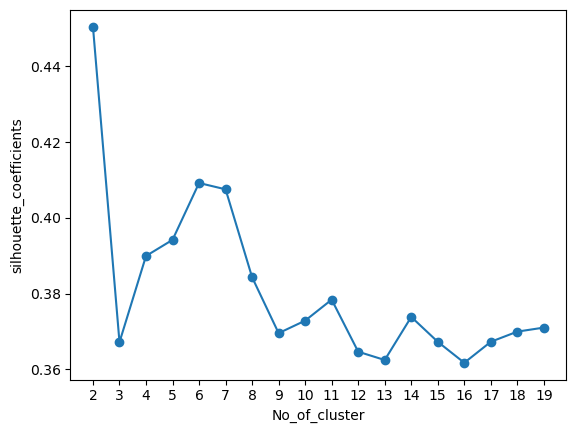

In [23]:
plt.plot(range(2,20),silhouette_coefficientss,marker='o')
plt.xticks(range(2,20))
plt.xlabel('No_of_cluster')
plt.ylabel('silhouette_coefficients')
plt.show()

Text(0, 0.5, 'Eculedian Distance')

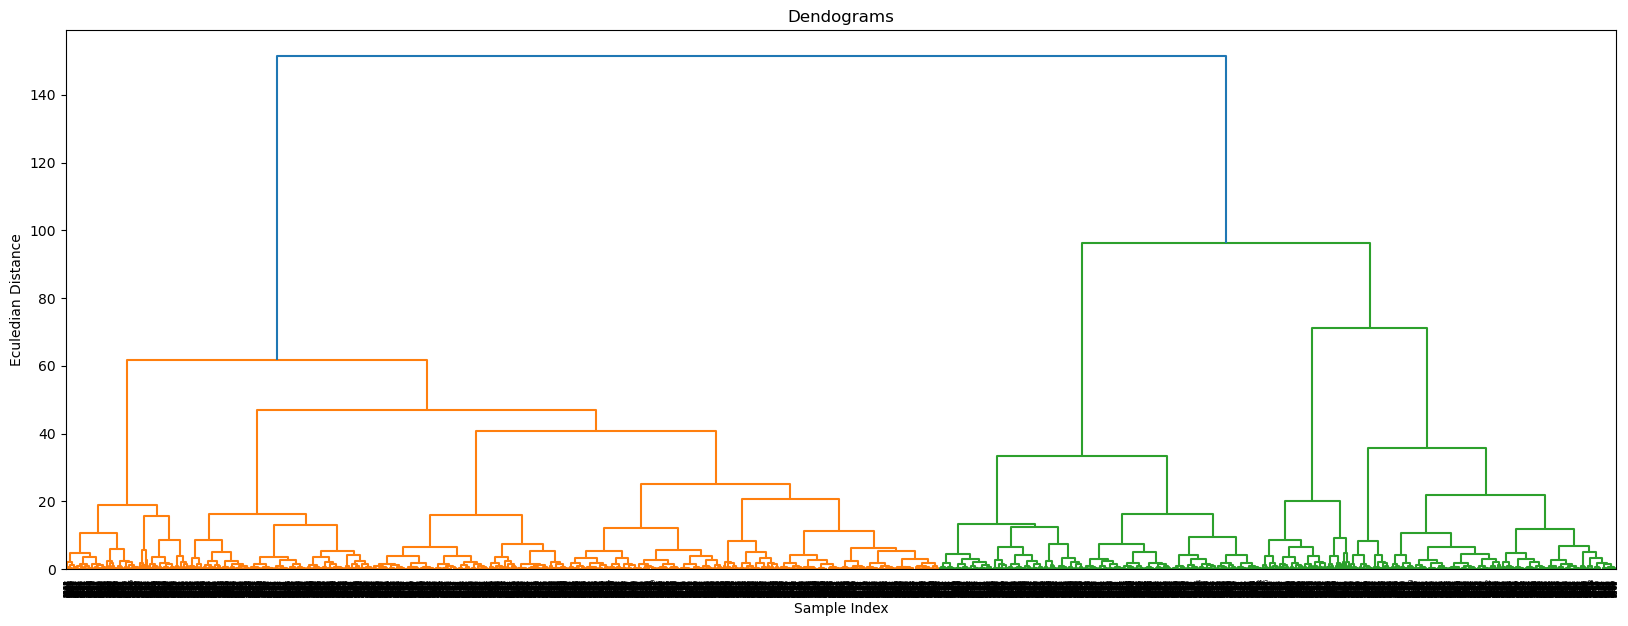

In [24]:
##Hierarichal Clustering
##we need to cerate dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('Dengograms')
sc.dendrogram(sc.linkage(X_train_pca,method='ward'))
plt.title('Dendograms')
plt.xlabel('Sample Index')
plt.ylabel('Eculedian Distance')

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(X_train_pca)

AgglomerativeClustering()

In [26]:
cluster.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

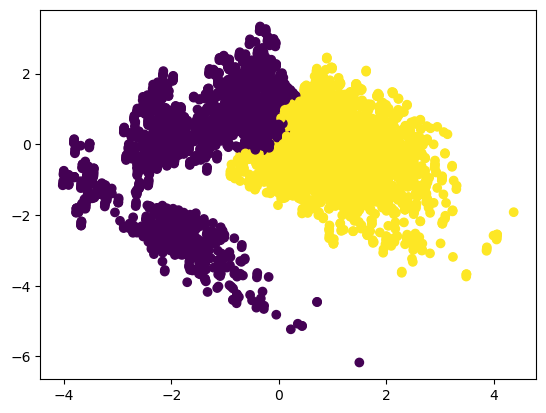

In [27]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=cluster.labels_)

In [28]:
cluster.fit(X_test_pca)
test_lables=cluster.labels_
test_lables

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

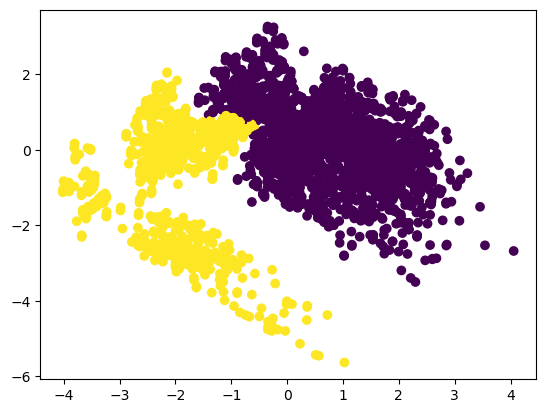

In [29]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=test_lables)

In [30]:
silhouette__coefficientss=[]
for i in range(2,20):
    algo= AgglomerativeClustering(n_clusters=i,linkage='ward')
    algo.fit(X_train_pca)
    scorees=silhouette_score(X_train_pca,algo.labels_)
    silhouette__coefficientss.append(scorees)

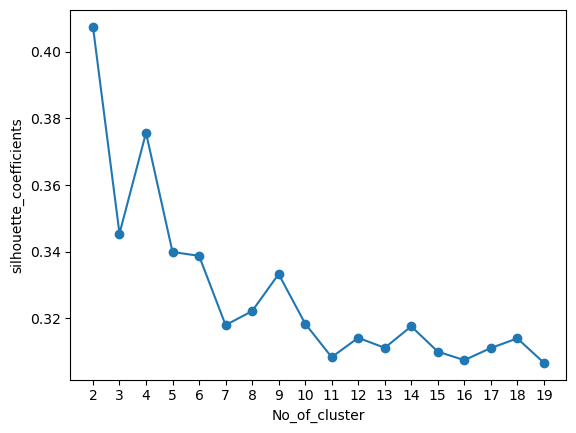

In [31]:
plt.plot(range(2,20),silhouette__coefficientss,marker='o')
plt.xticks(range(2,20))
plt.xlabel('No_of_cluster')
plt.ylabel('silhouette_coefficients')
plt.show()

In [32]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5)
dbscan.fit(X_train_pca)


DBSCAN()

In [33]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

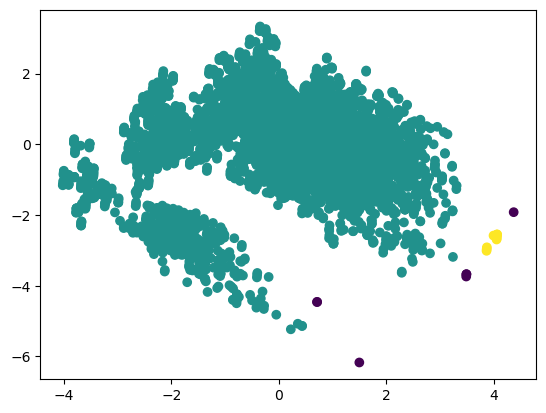

In [34]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=dbscan.labels_)

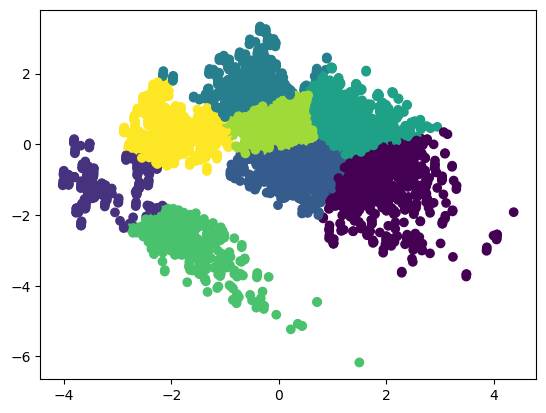

In [35]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train_labels)